Trabajo Computacional 1 - Aceleradores y detectores de partículas 

Grupo: Catalina Fuentes (202220750), Daniela León (), David Cantini ()

PARTE 1 - MONOCROMADOR

Resultado (cuando theta ~ 180°):
x_salida = -0.999843
y_salida = -0.000054
R_salida = 0.999843
-R (desde x) ~ 0.999843
R_target (esperado) = 1.000000


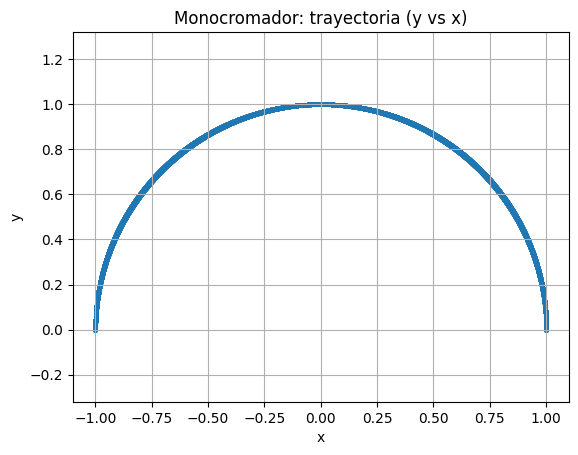

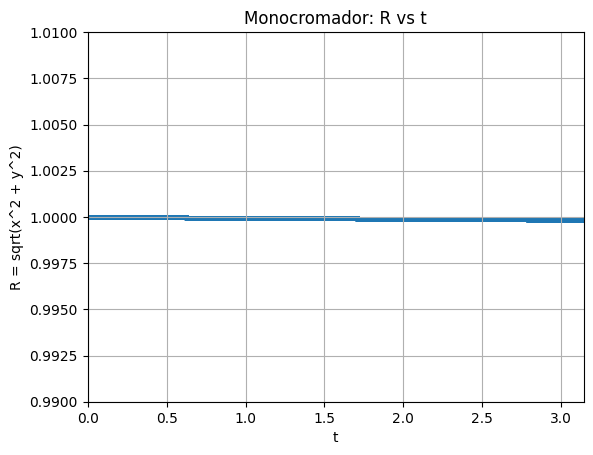

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
M = 1.0
q = 1.0
B = 1.0
dt = 1e-4
t_max = 10.0

# Condiciones iniciales
R0 = 1.0
x = R0
y = 0.0
vx = 0.0
vy = 1.0

# Correcciones numéricas para que R no derive
ENFORCE_TANGENTIAL = True
ENFORCE_SPEED = True
PROJECT_POSITION = False 

# Valores de referencia
v0 = np.sqrt(vx**2 + vy**2)
R_target = M * v0 / (abs(q) * abs(B))

# Listas para guardar datos
xs, ys, ts, Rs, thetas = [], [], [], [], []

t = 0.0
theta = np.arctan2(y, x)
if theta < 0:
    theta += 2*np.pi

while t <= t_max and theta < np.pi:
    R = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)

    if R == 0:
        break

    # Fuerza: magnitud q*v*B, dirección hacia el centro (-r_hat)
    Fx = -q * v * B * (x / R)
    Fy = -q * v * B * (y / R)

    ax = Fx / M
    ay = Fy / M

    # Euler-Feynman / Euler-Cromer: primero velocidad, luego posición
    vx = vx + ax * dt
    vy = vy + ay * dt
    x = x + vx * dt
    y = y + vy * dt

    # Correcciones numéricas 
    if ENFORCE_TANGENTIAL or ENFORCE_SPEED or PROJECT_POSITION:
        R_now = np.sqrt(x**2 + y**2)
        if R_now != 0:
            rx = x / R_now
            ry = y / R_now

            if ENFORCE_TANGENTIAL:
                v_rad = vx * rx + vy * ry
                vx = vx - v_rad * rx
                vy = vy - v_rad * ry

            if ENFORCE_SPEED:
                v_now = np.sqrt(vx**2 + vy**2)
                if v_now != 0:
                    scale = v0 / v_now
                    vx *= scale
                    vy *= scale

            if PROJECT_POSITION:
                x = R_target * rx
                y = R_target * ry

    t = t + dt

    R_save = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    if theta < 0:
        theta += 2*np.pi

    xs.append(x)
    ys.append(y)
    ts.append(t)
    Rs.append(R_save)
    thetas.append(theta)

# Resultado al llegar a 180°
x_exit = xs[-1] if xs else x
y_exit = ys[-1] if ys else y
R_exit = np.sqrt(x_exit**2 + y_exit**2)

print("Resultado (cuando theta ~ 180°):")
print(f"x_salida = {x_exit:.6f}")
print(f"y_salida = {y_exit:.6f}")
print(f"R_salida = {R_exit:.6f}")
print(f"-R (desde x) ~ {-x_exit:.6f}")
print(f"R_target (esperado) = {R_target:.6f}")

# Plot 1: trayectoria y vs x
plt.figure()
plt.scatter(xs, ys, s=6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Monocromador: trayectoria (y vs x)")
plt.axis("equal")
plt.grid(True)
plt.show()

# Plot 2: R vs t
plt.figure()
plt.scatter(ts, Rs, s=6)
plt.xlabel("t")
plt.ylabel("R = sqrt(x^2 + y^2)")
plt.title("Monocromador: R vs t")
plt.grid(True)

plt.xlim(0, ts[-1])  # hasta donde realmente hay datos

eps = 0.01 * R_target
plt.ylim(R_target - eps, R_target + eps)

plt.show()
